In [19]:
!pip install requests
import requests
import os
import json

#BEFORE YOU CLICK 'RUN ALL'
# you can collapse function definitions so its more readable
# 

Defaulting to user installation because normal site-packages is not writeable


In [20]:
#DEFAULT VARIABLES 
#do not change unless you know what you are doing
#and please make clear what you change and why

api_key = 'HDEV-0465ed95-8059-4c6d-b08f-40831d5c957d'# do not touch
mode = "competitive" #no caps

allMaps = {"/Game/Maps/Ascent/Ascent": "Ascent", 
"/Game/Maps/Bonsai/Bonsai": "Split",
"/Game/Maps/Canyon/Canyon": "Fracture",
"/Game/Maps/Duality/Duality": "Bind",
"/Game/Maps/Foxtrot/Foxtrot": "Breeze",
"/Game/Maps/Jam/Jam": "Lotus",
"/Game/Maps/Juliett/Juliett": "Sunset",
"/Game/Maps/Pitt/Pitt": "Pearl",
"/Game/Maps/Port/Port": "Icebox",
"/Game/Maps/Triad/Triad": "Haven",                  #new map Abyss soon
"/Game/Maps/HURM/HURM_Alley/HURM_Alley": "District",
"/Game/Maps/HURM/HURM_Bowl/HURM_Bowl": "Kasbah",
"/Game/Maps/HURM/HURM_Helix/HURM_Helix": "Drift",
"/Game/Maps/HURM/HURM_Yard/HURM_Yard": "Piazza",
"/Game/Maps/Poveglia/Range": "The Range"
}

allGuns ={

    #WeaponID conversions
}

allArmor = {
    #ArmorID conversions
    "": "No Shield",
    "822BCAB2-40A2-324E-C137-E09195AD7692": "Heavy Shields",
    "4DEC83D5-4902-9AB3-BED6-A7A390761157": "Light Shields"
}



DBUG = False #set to true to unleash the debug statements
if DBUG:
    dbug_print = print
else:
    dbug_print = lambda *args, **kwargs: None


import time

#USELESS but i am keeping for future reference i will prob delete it anyway
# from collections import deque

# all_requests = deque()

# def check_time():
    
#     global all_requests

#     print(f"\t\t\trequests made in the last min: [{len(all_requests)}]")
#     if(len(all_requests) >= 30):
#         timediff = time.time() - all_requests.popleft()
#         print(f"\t\t\t\ttime elapsed from oldest request: [{timediff}]")
#         if(timediff < 60):
#             print(f"\t\t\t\tsleeping for [{60-timediff}] sec")
#             time.sleep(60-timediff)
        
#         check_time()
# def put_time():
#     global all_requests

#     print("\t\t\trequest made.")
#     all_requests.append(time.time())


#ensures that we dont exceed the max requests. write this after every API request!!!!!
def limit_check(response):
    print("\t\t\trequest made.")
    print(f"\t\t\t\tAlleged requests made: [{response.headers['x-ratelimit-limit']}]/30")
    if(int(response.headers['x-ratelimit-limit']) >= 30):
        print(f"\t\t\t\tsleeping for [{response.headers['x-ratelimit-reset']} + 2] sec")
        time.sleep(int(response.headers['x-ratelimit-reset']) + 2)     

#ALL API REQUESTS SHOULD LOOK LIKE THIS
#       print("Making request...")
#       response = <API request statmement>
#       limit_check(response)


In [21]:
#FUNCTION DEFINITIONS(you can collapse)
#These all directly access API which is why theyre here

#Accesses API
#returns puuid of player
def get_puuid(name: str, tag: str, api_key: str):

    url = f"https://api.henrikdev.xyz/valorant/v1/account/{name}/{tag}"
    headers = {'Authorization': f'{api_key}'}

    print("Making request...")
    response = requests.get(url, headers=headers)
    limit_check(response)



    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch puuid: {response.status_code}")
        error = response.json()['errors'][0]['message']
        details= response.json()['errors'][0]['details']
        code = response.json()['status']
        if details == "null":
            details = ""     
        else:
            details = f"Details: {details}"
        response_message = f"{error} Code:{code}....{details}"
        print(response_message, "\nEXITING PROGRAM")
        quit()

#Accesses API
#returns the player's raw data match history
#format is here: https://valapidocs.techchrism.me/endpoint/match-history 
def get_raw(puuid: str,api_key: str,queue: str, startIndex: int, endIndex: int):
    url = f"https://api.henrikdev.xyz/valorant/v1/raw"
    headers = {
        'Authorization': f'{api_key}',
    }
    body = {
        "type": "matchhistory",
        "value": puuid,
        "region": "na",
        "queries": f"?startIndex={startIndex}&endIndex={endIndex}&queue={queue}"
    }
    
    print("Making request...")
    response = requests.post(url, headers=headers, json=body)
    limit_check(response)

 
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch raw_data: {response.status_code}")
        error = response.json()['errors'][0]['message']
        details= response.json()['errors'][0]['details']
        code = response.json()['status']
        if details == "null":
            details = ""     
        else:
            details = f"Details: {details}"
        response_message = f"{error} Code:{code}....{details}"
        print(response_message, "\nEXITING PROGRAM")
        quit()

#Accesses API
#returns match details of matchID
#format is here: https://valapidocs.techchrism.me/endpoint/match-details 
def get_match_details(matchID: str,api_key: str):
    url = f"https://api.henrikdev.xyz/valorant/v1/raw"
    headers = {
        'Authorization': f'{api_key}',
    }
    body = {
        "type": "matchdetails",
        "value": matchID,
        "region": "na",
    }
    
    
    print("Making request...")
    response = requests.post(url, headers=headers, json=body)
    limit_check(response)
 
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch raw_data: {response.status_code}")
        error = response.json()['errors'][0]['message']
        details= response.json()['errors'][0]['details']
        code = response.json()['status']
        if details == "null":
            details = ""     
        else:
            details = f"Details: {details}"
        response_message = f"{error} Code:{code}....{details}"
        print(response_message, "\nEXITING PROGRAM")
        quit()


In [22]:
#READ THIS                                   
#FUNCTION DEFITIONS (you can collapse all of these)
#these access and save data

import statistics

#Does not access API
#auxillary function for the get_data functions
#returns the new team configuration(flips teams)
#returns either dict or str
def switch_teams(team_side):
    dbug_print("---SWITCHING TEAMS---")
    if isinstance(team_side, dict):

        for key, value in team_side.items():
            if value['Side'] == "Attack":
                team_side[key]['Side'] = "Defense"
            elif value['Side'] == "Defense":
                team_side[key]['Side'] = "Attack"

    elif isinstance(team_side, str):

        if team_side == "Attack":
            team_side = "Defense"
        else:
            team_side = "Attack"

    else:
        print("team_side has type ", type(team_side))
        raise ValueError("Invalid team side")

#Does not access API
#auxillary function for analyze_match
#mutates output_dict, does it for specific player
def get_data_for_player(curr_match: dict, map_name: str, puuid: str, output_dict: dict):
    
    player_team = next((player['teamId'] for player in curr_match['players'] if player['subject'] == puuid), None)
    if player_team == "Red": #if player_team is None, player was not found
        team_side = "Attack"
    elif player_team == "Blue":
        team_side = "Defense"



    round_count = 0
    kill_array_index = 0
    for round_result in curr_match['roundResults']:
        if kill_array_index < len(curr_match['kills']): #as long as there are still kills to be checked, we continue
            dbug_print("\n")
            
            round_count += 1
            dbug_print('currently examining new round [', round_count, "]")
            dbug_print('  player is on ', team_side)

            if round_count > 24 or ( round_count % 12 == 1 and round_count > 1):  #switch teams when needed(after round 12,and in OT)  *not explicitly tested to be correct
               
                switch_teams( team_side)


                
        
            #get specified player's stats
            for player_stat in round_result['playerStats']:
                if player_stat['subject'] == puuid:
                    dbug_print("\tplayer stats found")
                    curr_round_stats = player_stat
                    break
            
            #location data will need these things
            loadout_value = curr_round_stats['economy']['loadoutValue']
            weapon = curr_round_stats['economy']['weapon']
            armor  = allArmor[curr_round_stats['economy']['armor']]



            #determine where to put the next entry in the array by loadout value
            array_spot = (int)(loadout_value/50)
            dbug_print("\tloadout value[", loadout_value, "]->array spot[", array_spot, "]")
        
        
        #calculate round length

            #calculate start time 
            round_start_time = curr_match['kills'][kill_array_index]['gameTime'] - curr_match['kills'][kill_array_index]['roundTime']
            
            #calculate start time of next round, if there is no next round, time = -1
            next_round_start_time = -1
            for kill_info in curr_match['kills']:
                if kill_info['round'] == round_count + 1:
                    next_round_start_time = kill_info['gameTime'] - kill_info['roundTime']
                    break
        

            #subtract the buy phase time
            buy_phase = 0
            if(round_count == 1 or round_count == 13 or round_count == 25):
                buy_phase = 45000
            else:
                buy_phase = 30000

            if(next_round_start_time == -1):
                round_length = curr_match['matchInfo']['gameLengthMillis'] - round_start_time #might be wrong because gameLengthMillis might not start from the start of round 1
            else:
                round_length = next_round_start_time - round_start_time - buy_phase
        #round length calculated
        
            dbug_print('\t\tround start(ms)  = ', round_start_time)
            dbug_print('\t\tnext round start(ms)  = ', next_round_start_time)
            dbug_print('\t\tbuy phase(ms)    =', buy_phase)
            dbug_print("\t\tround length(ms) = ", round_length)



            
            #loop through all kills in the current round
            while(kill_array_index < len(curr_match['kills']) and curr_match['kills'][kill_array_index]['round']+1 == round_count):
                dbug_print('\t\t\tcurrently examining kills on round ', curr_match['kills'][kill_array_index]['round']+1, 'should match ', round_count)
                curr_kill_info = curr_match['kills'][kill_array_index]

                if(curr_kill_info['victim'] == puuid):#our player died!

                    death_time_percentage = (int)(round(curr_kill_info['roundTime']/round_length, 2)*100)
                    dbug_print("\t\t\t\tdeath_time[0,100]: ", death_time_percentage, "%")#DBUG

                    #GET RID OF STUPID ISO ULT DATA
                    if abs(curr_kill_info['victimLocation']['x']) <= 20000 and abs(curr_kill_info['victimLocation']['y']) <= 20000:
                        
                        dbug_print('\t\t\t\tINSERTING death INTO SLOT: [', array_spot, "]")
                        output_dict[map_name][team_side]['death_info'][array_spot].append({

                            'Location': {'x': curr_kill_info['victimLocation']['x'], 'y':curr_kill_info['victimLocation']['y']},
                            'Armor' : armor,
                            
                        })

                    #add to the death time
                    output_dict[map_name]['All_Death_Times'][death_time_percentage]+=1
                
                if(curr_kill_info['killer'] == puuid):#our player got a kill!
                    
                    kill_time_percentage = (int)(round(curr_kill_info['roundTime']/round_length,2)*100)
                    dbug_print("\t\t\t\tkill_time[0,100]: ", kill_time_percentage, "%")#DBUG

                    #add kill info (a bit more complicated)
                    for player_loc in curr_kill_info['playerLocations']:

                        if player_loc['subject'] == puuid:

                            #GET RID OF STUPID ISO ULT DATA
                            if abs(player_loc['location']['x']) <= 20000 and abs(player_loc['location']['y']) <= 20000:
                                
                                dbug_print('\t\t\t\tINSERTING kill INTO SLOT: [', array_spot, "]")
                                
                                #add datapoint to output
                                output_dict[map_name][team_side]['kill_info'][array_spot].append({
                                    'Location': {'x': player_loc['location']['x'], 'y': player_loc['location']['y']},
                                    'ViewRadians': player_loc['viewRadians'],
                                    'Weapon': weapon
                                })
                            break
                            

                    #add to the kill time
                    output_dict[map_name]['All_Kill_Times'][kill_time_percentage]+=1
                


                kill_array_index += 1

# UNFINISHSED
#Does not access API 
#auxillary function for analyze_match
#mutates output_dict, different algorithm for all players
def get_data_for_all_players(curr_match: dict, map_name: str, output_dict: dict):
    

    all_players_stats = {player['subject']: {"Side": "Attack" if player['teamId'] == "Red" else "Defense" if player['teamId'] == "Blue" else "MISSING_DATA", "Loadout_Value": None, "Weapon": None, "Armor": None} for player in curr_match['players']}
    round_count = 0
    for round_result in curr_match['roundResults']:
        round_count += 1

        dbug_print('\tcurrently examining new round [', round_count, "]")

        if round_count > 24 or ( round_count % 12 == 1 and round_count > 1):  #switch teams when needed(after round 12,and in OT)  *not explicitly tested to be correct
            switch_teams( all_players_stats)

        #get all the players buy values, weapons, armor (this may not be very effective, because we are getting all this info for players even if they didnt get a kill this round)
        dbug_print("\t\tgetting all player economies")
        if round_result['playerEconomies'] is not None and isinstance(round_result['playerEconomies'], list):
            for curr_player_economy in round_result['playerEconomies']:
                all_players_stats[curr_player_economy['subject']]['Loadout_Value'] = curr_player_economy['loadoutValue']
                all_players_stats[curr_player_economy['subject']]['Weapon'] = curr_player_economy['weapon']
                all_players_stats[curr_player_economy['subject']]['Armor'] = allArmor[curr_player_economy['armor']]
        else:
            break

        
        #time to pull out data
        if round_result['playerStats'] is not None and isinstance(round_result['playerStats'], list):
            for player_stat in round_result['playerStats']:

                if player_stat['kills'] is not None and isinstance(player_stat['kills'], list):
                    for curr_kill in player_stat['kills']:
                        dbug_print("\t\t\tProcessing new kill/death in round [", round_count, "]")
                        #put in DEATH INFO
                        
                        #GET RID OF STUPID ISO ULT DATA
                        if abs(curr_kill['victimLocation']['x']) > 20000 or abs(curr_kill['victimLocation']['y']) > 20000:
                            continue

                        #calculate where we put datapoint
                        array_spot = (int)(all_players_stats[curr_kill['victim']]['Loadout_Value']/50)
                    
                        dbug_print('\t\t\t\tINSERTING death INTO SLOT: [', array_spot, "]")

                        #add datapoint to output
                        output_dict[map_name][all_players_stats[curr_kill['victim']]['Side']]['death_info'][array_spot].append( {
                        
                            'Location': {'x': curr_kill['victimLocation']['x'], 'y':curr_kill['victimLocation']['y']},
                            'Armor' : all_players_stats[curr_kill['victim']]['Armor']

                        })

                        #put in KILL INFO
                        array_spot = (int)(all_players_stats[curr_kill['killer']]['Loadout_Value']/50)
                    
                        dbug_print('\t\t\t\tINSERTING kill INTO SLOT: [', array_spot, "]")

                        #in case killer location is not found, we skip this(killer location not found is actually possible to happen!)
                        for item in curr_kill['playerLocations']:
                            if item['subject'] == curr_kill['killer']:
                                killer_location = item
                                break
                        else:
                            continue

                        #GET RID OF STUPID ISO ULT DATA
                        if abs(killer_location['location']['x']) > 20000 or abs(killer_location['location']['y']) > 20000:
                            continue

                        output_dict[map_name][all_players_stats[curr_kill['killer']]['Side']]['kill_info'][array_spot].append({
                        
                            'Location': {'x': killer_location['location']['x'], 'y':killer_location['location']['y']},
                            'ViewRadians' : killer_location['viewRadians'],
                            'Weapon' : all_players_stats[curr_kill['killer']]['Weapon']

                        })
                else:
                    continue         
        else:
            break
        

#Does not access API
#auxillary function for get_all_location_data
#given match details (format: https://valapidocs.techchrism.me/endpoint/match-details)
#mutates output_dict by placing new data inside
def analyze_match(curr_match: dict, puuid: str, output_dict: dict):
    

    map_id = curr_match['matchInfo']['mapId']
    map_name = allMaps[map_id]

    analyze_all_players = puuid == ""

    print(f"----CURRENT MAP: [{map_name}]----")

    if map_name not in output_dict:
        if(analyze_all_players):
            output_dict[map_name] = {

               #No kill/death times for allplayers
                "Attack": {
                    #make these all linkedlists which apparently is using deque()
                    "kill_info": [[] for _ in range(160)],
                    "death_info": [[] for _ in range(160)],
                    #WE ARE DITCHING THE PLANT INFO!, making a separate dictionary that gets ALL plant data and defuse data(not just specific player)
                },
                "Defense": {
                    "kill_info": [[] for _ in range(160)],
                    "death_info": [[] for _ in range(160)]
                }
            }
        else:
            output_dict[map_name] = {

                'All_Kill_Times' : [0]*101, #indexes 0 thru 100 = 101 elements (these are % numbers)
                'All_Death_Times': [0]*101,

                "Attack": {
                    #make these all linkedlists which apparently is using deque()
                    "kill_info": [[] for _ in range(160)],
                    "death_info": [[] for _ in range(160)],
                    #WE ARE DITCHING THE PLANT INFO!, making a separate dictionary that gets ALL plant data and defuse data(not just specific player)
                },
                "Defense": {
                    "kill_info": [[] for _ in range(160)],
                    "death_info": [[] for _ in range(160)]
                }
            }

    if(analyze_all_players):
        get_data_for_all_players(curr_match, map_name, output_dict)
    else:
        get_data_for_player(curr_match, map_name, puuid, output_dict)
    
    return output_dict


#Accesses API(indirectly)
#returns specified(puuid) player's data 
#data structure image link: [to be added]
def get_all_location_data(puuid: str, all_match_ids: []):
    to_return_dict = {}
    print("START!")
    for index, match_id in enumerate(all_match_ids):
        curr_match = get_match_details(match_id, api_key)

        print("\nExamining Match [", index+1, "]")

        to_return_dict = analyze_match(curr_match, puuid, to_return_dict)


    return to_return_dict

#Accesses API(indirectly)
#returns an array of all of the match ids that we have access to (from the api)
def get_player_match_IDs(name: str, tag: str):
    global puuid
    puuid = get_puuid(name, tag, api_key)['data']['puuid']
    match_history: dict = get_raw(puuid, api_key, mode ,0 ,25)

    total_elements = match_history['Total']
 
    
    history = []

    history.extend([match['MatchID'] for match in match_history['History']])

    if total_elements > 25:#matchhistory: limit = 25 at a time
        for i in range(25, total_elements, 25):
            next_batch = get_raw(puuid, api_key, mode, i, i+25)
            history.extend([match['MatchID'] for match in next_batch['History']])

    return history


In [23]:
#INPUT HERE

#this is the person you want to get match history from
name = "GEA joli" #change these :)
tag = "brrr"

#no you cannot specify how many matches you want to get
#just truncate the history array 
history = get_player_match_IDs(name,tag) 



# history is an array.
# the length of the array is the amount of matches we have access to
# feel free to change the contents of the array
# lower index entries are more recent
print("history[]")
print(f"   Type: {type(history)} ")
print(f'   Length: [{len(history)}]')






Making request...
			request made.
				Alleged requests made: [1]/30
Making request...
			request made.
				Alleged requests made: [2]/30
history[]
   Type: <class 'list'> 
   Length: [17]


In [24]:
#Warning: this may take a long time (about 2 seconds per item in history[])
#history[] is full of matchIDs, so feel free to shorten it or do whatever
#87 elements took 3min 13sec

#analyze all tells the program if u want to get playerspecific data, or non player specific
analyze_all = True

if(analyze_all):
    puuid = ''

test_allData = get_all_location_data(puuid, history) 

#prints out the entire data structure u can run it if u want or u can comment it out
print(json.dumps(test_allData, indent=4))


#ignore:
    #I will change up the get_all_location_data function for more customizability, and create more data structures
    #instead of having return values it will just mutate multiple dictionaries probably

    #   kill + death distance
    #   fix kill and death time!!!! and put in separate map
    #   maybe more cool things

START!
Making request...
			request made.
				Alleged requests made: [1]/30

Examining Match [ 1 ]
----CURRENT MAP: [Breeze]----
Making request...
			request made.
				Alleged requests made: [2]/30

Examining Match [ 2 ]
----CURRENT MAP: [Lotus]----
Making request...
			request made.
				Alleged requests made: [3]/30

Examining Match [ 3 ]
----CURRENT MAP: [Ascent]----
Making request...
			request made.
				Alleged requests made: [4]/30

Examining Match [ 4 ]
----CURRENT MAP: [Breeze]----
Making request...
			request made.
				Alleged requests made: [5]/30

Examining Match [ 5 ]
----CURRENT MAP: [Icebox]----
Making request...
			request made.
				Alleged requests made: [6]/30

Examining Match [ 6 ]
----CURRENT MAP: [Sunset]----
Making request...
			request made.
				Alleged requests made: [7]/30

Examining Match [ 7 ]
----CURRENT MAP: [Ascent]----
Making request...
			request made.
				Alleged requests made: [8]/30

Examining Match [ 8 ]
----CURRENT MAP: [Split]----
Making request...
	

In [25]:
#READ THIS
#DATA PLOTTING FUNCTIONS(feel free to collapse)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.colors import ListedColormap
from scipy.ndimage import gaussian_filter
import matplotlib.colors as mcolors

#plots kill heatmap, death heatmap, and combines them to make a positioning heatmap
def plot_data(all_data: dict, map_name: str, attack_options, defense_options):

    attack = attack_options is not None and isinstance(attack_options,dict)
    defense = defense_options is not None and isinstance(defense_options, dict)

    selected_map = all_data[map_name]


    combined_data = {
            'kill': [],
            'death': []
    }
    
    if(attack):
        if(attack_options['kills'] != None):
            if 0 <= attack_options['kills']['lower'] <= 159 and 0 <= attack_options['kills']['upper'] <= 159 and attack_options['kills']['lower'] <= attack_options['kills']['upper']:
                for i in range(attack_options['kills']['lower'], attack_options['kills']['upper'] + 1):
                    curr_kill_value = selected_map['Attack']['kill_info'][i]
                    combined_data['kill'].extend(curr_kill_value)

        if(attack_options['deaths'] != None):
            if 0 <= attack_options['deaths']['lower'] <= 159 and 0 <= attack_options['deaths']['upper'] <= 159 and attack_options['deaths']['lower'] <= attack_options['deaths']['upper']:
                for i in range(attack_options['deaths']['lower'], attack_options['deaths']['upper'] + 1):
                    curr_death_value = selected_map['Attack']['death_info'][i]
                    combined_data['death'].extend(curr_death_value)


    if(defense):
        if(defense_options['kills'] != None):
            if 0 <= defense_options['kills']['lower'] <= 159 and 0 <= defense_options['kills']['upper'] <= 159 and defense_options['kills']['lower'] <= defense_options['kills']['upper']:
                for i in range(defense_options['kills']['lower'], defense_options['kills']['upper'] + 1):
                    curr_kill_value = selected_map['Defense']['kill_info'][i]
                    combined_data['kill'].extend(curr_kill_value)

        if(defense_options['deaths'] != None):
            if 0 <= defense_options['deaths']['lower'] <= 159 and 0 <= defense_options['deaths']['upper'] <= 159 and defense_options['deaths']['lower'] <= defense_options['deaths']['upper']:
                for i in range(defense_options['deaths']['lower'], defense_options['deaths']['upper'] + 1):
                    curr_death_value = selected_map['Defense']['death_info'][i]
                    combined_data['death'].extend(curr_death_value)


    plt.figure(figsize=(10, 8))


    # Plot kill data
    if combined_data['kill']:
        y_coords = [loc['Location']['x'] for loc in combined_data['kill'] ]#x,y swapped!!!!
        x_coords = [loc['Location']['y'] for loc in combined_data['kill'] ]


        # Perform kernel density estimation
        xy = np.vstack([x_coords, y_coords])
        kde = gaussian_kde(xy, bw_method=0.05)  # Adjust bandwidth to change the decay rate
        x_min, x_max = min(x_coords) - 1, max(x_coords) + 1
        y_min, y_max = min(y_coords) - 1, max(y_coords) + 1
        x, y = np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200)
        X, Y = np.meshgrid(x, y)
        Z_Kill = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

        # Plot the scatter plot of points
        
        plt.figure(figsize=(18, 8))
        if(True): #change the boolean in here if u wanna see some extra data
            plt.subplot(1, 2, 1)
            plt.scatter(x_coords, y_coords, c='green', alpha=0.3, s=30)  # Reduced size to half
            plt.title('Kill Locations')
            plt.xlabel('X coordinate')
            plt.ylabel('Y coordinate')

            # Plot the KDE contour map
            plt.subplot(1, 2, 2)
            contour = plt.contourf(X, Y, Z_Kill, levels=10, cmap='magma')  # Adjust levels as needed
            plt.colorbar(contour)
            plt.title('Topographical Heatmap with KDE')
            plt.xlabel('X coordinate')
            plt.ylabel('Y coordinate')
            plt.show()


        # Apply logarithmic scaling to enhance contrast
        Z1_log = np.log(Z_Kill+ 0.00000004)  # Adding 1 to avoid log(0)
        plt.imshow(Z1_log, cmap='magma', origin='lower', extent=[x_min, x_max, y_min, y_max])
        plt.colorbar(label='Log Density')
        plt.title('Logarithmic Scale Heatmap of KDE(Kills)')
        plt.xlabel('X coordinate')
        plt.ylabel('Y coordinate')

        plt.tight_layout()
        plt.show()
        
        
            
            # direction = event.get('ViewRadians', 0)
            # dy = np.cos(direction) * 400 #x,y swapped!!!!
            # dx = np.sin(direction) * 400
            # plt.arrow(x, y, dx, dy, color='green', head_width=10, head_length=20, alpha=0.3, linewidth=0.5)
    
    # Plot death data
    if combined_data['death']:
        y_coords = [loc['Location']['x'] for loc in combined_data['death'] ]#x,y swapped!!!!
        x_coords = [loc['Location']['y'] for loc in combined_data['death'] ]
        


        # Perform kernel density estimation
        xy = np.vstack([x_coords, y_coords])
        kde = gaussian_kde(xy, bw_method=0.05)  # Adjust bandwidth to change the decay rate
        x_min, x_max = min(x_coords) - 1, max(x_coords) + 1
        y_min, y_max = min(y_coords) - 1, max(y_coords) + 1
        x, y = np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200)
        X, Y = np.meshgrid(x, y)
        Z_Death = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

        # Plot the scatter plot of points
        plt.figure(figsize=(18, 8))

        if(True): #change the boolean in here if u wanna see some extra data
            plt.subplot(1, 2, 1)
            plt.scatter(x_coords, y_coords, c='red', alpha=0.3, s=30)  # Reduced size to half
            plt.title('Death Locations')
            plt.xlabel('X coordinate')
            plt.ylabel('Y coordinate')

            # Plot the KDE contour map
            plt.subplot(1, 2, 2)
            contour = plt.contourf(X, Y, Z_Death, levels=10, cmap='magma')  # Adjust levels as needed
            plt.colorbar(contour)
            plt.title('Topographical Heatmap with KDE')
            plt.xlabel('X coordinate')
            plt.ylabel('Y coordinate')
            plt.show()


        # Apply logarithmic scaling to enhance contrast
        Z2_log = np.log(Z_Death+ 0.00000004)  # Adding 1 to avoid log(0)
        plt.imshow(Z2_log, cmap='magma', origin='lower', extent=[x_min, x_max, y_min, y_max])
        plt.colorbar(label='Log Density')
        plt.title('Logarithmic Scale Heatmap of KDE(Deaths)')
        plt.xlabel('X coordinate')
        plt.ylabel('Y coordinate')

        plt.tight_layout()
        plt.show()


    # Compute the difference between the two KDEs and apply log scale
    # Compute the difference between the two KDEs
    Z_diff_log = Z1_log - Z2_log

    Z_diff_log = gaussian_filter(Z_diff_log, sigma=6)

    # Create a custom colormap with a nonlinear transition to white
    colors = [(0, 'white'), (0.175, '#FD3535'), (0.35, '#0E0E0E'), (0.65, '#0E0E0E'), (0.815, '#7BFF58'), (1, 'white')]
    cmap_diff = mcolors.LinearSegmentedColormap.from_list('custom_bwr', colors)


    # Plot for the difference heatmap
    plt.imshow(Z_diff_log, cmap=cmap_diff, origin='lower', extent=[x_min, x_max, y_min, y_max], vmin=-np.abs(Z_diff_log).max(), vmax=np.abs(Z_diff_log).max())
    plt.colorbar(label='Log Density Difference')
    plt.title('Log Density Difference Heatmap (Dataset 1 - Dataset 2)')
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.show()


    # plt.title(f"Game Events Visualization on {map_name}")
    # plt.xlabel('Y Coordinate')#x,y swapped!!!!
    # plt.ylabel('X Coordinate')
    # plt.grid(True)
    
    # # Add a legend to explain color codes
    # plt.scatter([], [], color='green', label='Kill Locations', alpha=0.3, s=50)
    # plt.scatter([], [], color='red', label='Death Locations', alpha=0.3, s=50)
    # plt.legend(loc='upper right')

    # plt.show()


#combines the kill and death data to generate a general 'activity' heatmap
def plot_activity(all_data: dict, map_name: str, attack_options, defense_options):

    attack = attack_options is not None and isinstance(attack_options,dict)
    defense = defense_options is not None and isinstance(defense_options, dict)

    selected_map = all_data[map_name]


    combined_data= []
    
    if(attack):
        if(attack_options['kills'] != None):
            if 0 <= attack_options['kills']['lower'] <= 159 and 0 <= attack_options['kills']['upper'] <= 159 and attack_options['kills']['lower'] <= attack_options['kills']['upper']:
                for i in range(attack_options['kills']['lower'], attack_options['kills']['upper'] + 1):
                    curr_kill_value = selected_map['Attack']['kill_info'][i]
                    combined_data.extend(curr_kill_value)

        if(attack_options['deaths'] != None):
            if 0 <= attack_options['deaths']['lower'] <= 159 and 0 <= attack_options['deaths']['upper'] <= 159 and attack_options['deaths']['lower'] <= attack_options['deaths']['upper']:
                for i in range(attack_options['deaths']['lower'], attack_options['deaths']['upper'] + 1):
                    curr_death_value = selected_map['Attack']['death_info'][i]
                    combined_data.extend(curr_death_value)


    if(defense):
        if(defense_options['kills'] != None):
            if 0 <= defense_options['kills']['lower'] <= 159 and 0 <= defense_options['kills']['upper'] <= 159 and defense_options['kills']['lower'] <= defense_options['kills']['upper']:
                for i in range(defense_options['kills']['lower'], defense_options['kills']['upper'] + 1):
                    curr_kill_value = selected_map['Defense']['kill_info'][i]
                    combined_data.extend(curr_kill_value)

        if(defense_options['deaths'] != None):
            if 0 <= defense_options['deaths']['lower'] <= 159 and 0 <= defense_options['deaths']['upper'] <= 159 and defense_options['deaths']['lower'] <= defense_options['deaths']['upper']:
                for i in range(defense_options['deaths']['lower'], defense_options['deaths']['upper'] + 1):
                    curr_death_value = selected_map['Defense']['death_info'][i]
                    combined_data.extend(curr_death_value)


    plt.figure(figsize=(10, 8))

    
    
    y_coords = [loc['Location']['x'] for loc in combined_data ]#x,y swapped!!!!
    x_coords = [loc['Location']['y'] for loc in combined_data ]

    # Perform kernel density estimation
    xy = np.vstack([x_coords, y_coords])
    kde = gaussian_kde(xy, bw_method=0.05)  # Adjust bandwidth to change the decay rate
    x_min, x_max = min(x_coords) - 1, max(x_coords) + 1
    y_min, y_max = min(y_coords) - 1, max(y_coords) + 1
    x, y = np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200)
    X, Y = np.meshgrid(x, y)
    Z_Kill = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

    # Plot the scatter plot of points
    
    plt.figure(figsize=(18, 8))
    if(True):
        plt.subplot(1, 2, 1)
        plt.scatter(x_coords, y_coords, c='blue', alpha=0.3, s=30)  # Reduced size to half
        plt.title('All Locations')
        plt.xlabel('X coordinate')
        plt.ylabel('Y coordinate')

        # Plot the KDE contour map
        plt.subplot(1, 2, 2)
        contour = plt.contourf(X, Y, Z_Kill, levels=10, cmap='magma')  # Adjust levels as needed
        plt.colorbar(contour)
        plt.title('Topographical Heatmap with KDE')
        plt.xlabel('X coordinate')
        plt.ylabel('Y coordinate')
        plt.show()


    # Apply logarithmic scaling to enhance contrast
    Z1_log = np.log(Z_Kill+ 0.00000004)  # Adding 1 to avoid log(0)
    plt.imshow(Z1_log, cmap='magma', origin='lower', extent=[x_min, x_max, y_min, y_max])
    plt.colorbar(label='Log Density')
    plt.title('Logarithmic Scale Heatmap of KDE(Kills + Deaths)')
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')

    plt.tight_layout()
    plt.show()
    

#plots all data for all maps in a standard way(coordinate points)
def plot_all_data(all_data):
    combined_data_by_map = {}

    # Combine all data into one dictionary
    for map_name, sides in all_data.items():

        
        
        combined_data_by_map[map_name] = {
            'kill': [kill for side in sides.values() for kills in side.get('kill_info', []) for kill in kills ],
            'death': [death for side in sides.values() for deaths in side.get('death_info', []) for death in deaths ]
        }

    # Plotting the data
    for map_name, data in combined_data_by_map.items():
        plt.figure(figsize=(10, 8))

        

        
        # Plot kill data
        for event in data['kill']:
            if 'Location' in event and event['Location']:
                y = event['Location']['x'] 
                x = event['Location']['y']
                plt.scatter(x, y, marker='o', color='green', alpha=0.3, s=15)  # Reduced size to half
                direction = event.get('ViewRadians', 0)
                dx = np.cos(direction) * 400
                dy = np.sin(direction) * 400
                plt.arrow(x, y, dx, dy, color='green', head_width=10, head_length=20, alpha=0.3, linewidth=0.5)
        
        # Plot death data
        if data['death']:
            y_coords = [loc['Location']['x'] for loc in data['death'] ]
            x_coords = [loc['Location']['y'] for loc in data['death'] ]
            plt.scatter(x_coords, y_coords, c='red', alpha=0.3, s=15)  # Reduced size to half

        plt.title(f"Game Events Visualization on {map_name}")
        plt.xlabel('Y Coordinate')
        plt.ylabel('X Coordinate')
        plt.grid(True)
        
        # Add a legend to explain color codes
        plt.scatter([], [], color='green', label='Kill Locations', alpha=0.3, s=50)
        plt.scatter([], [], color='red', label='Death Locations', alpha=0.3, s=50)
        plt.legend(loc='upper right')

        plt.show()





<Figure size 1000x800 with 0 Axes>

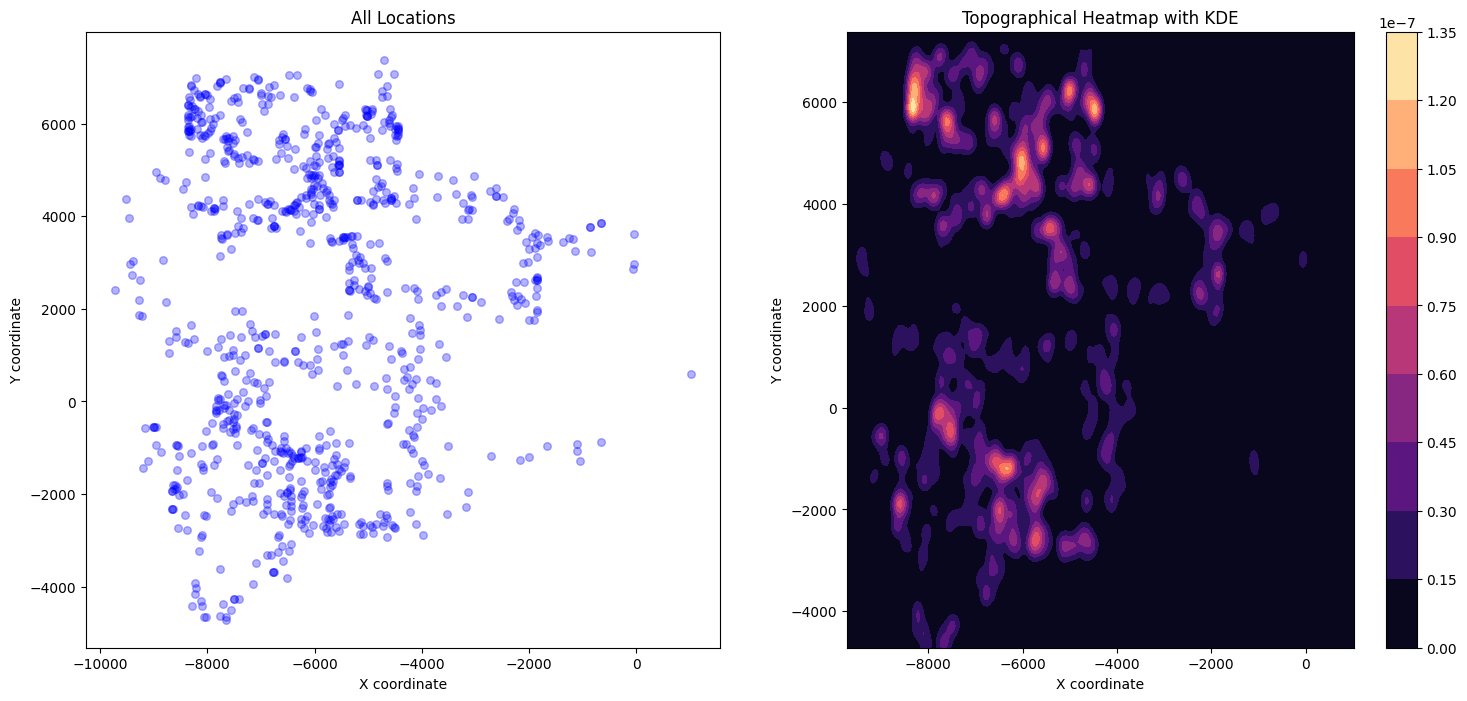

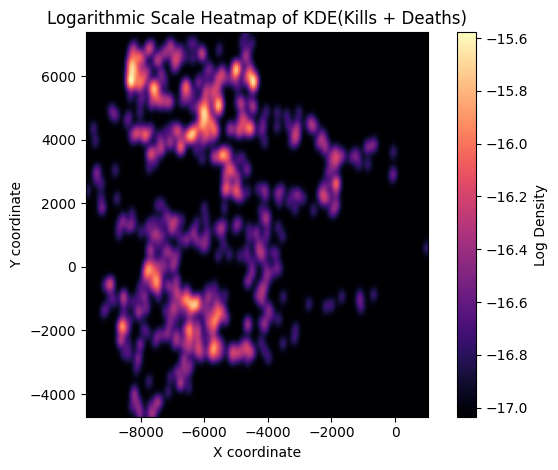

<Figure size 1000x800 with 0 Axes>

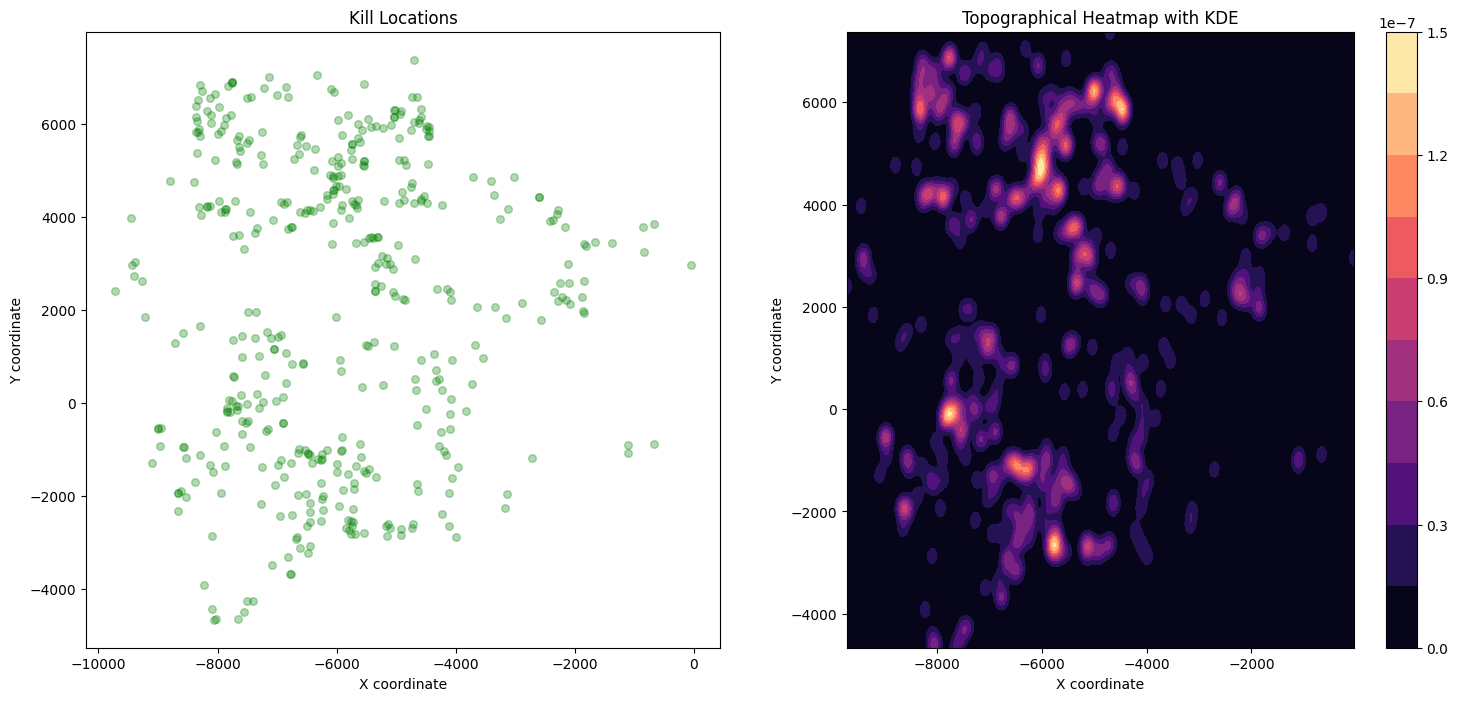

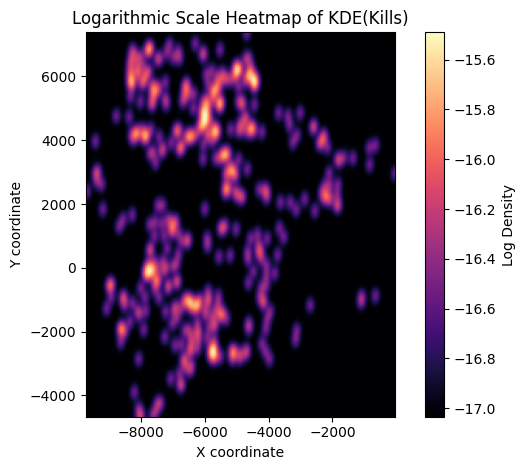

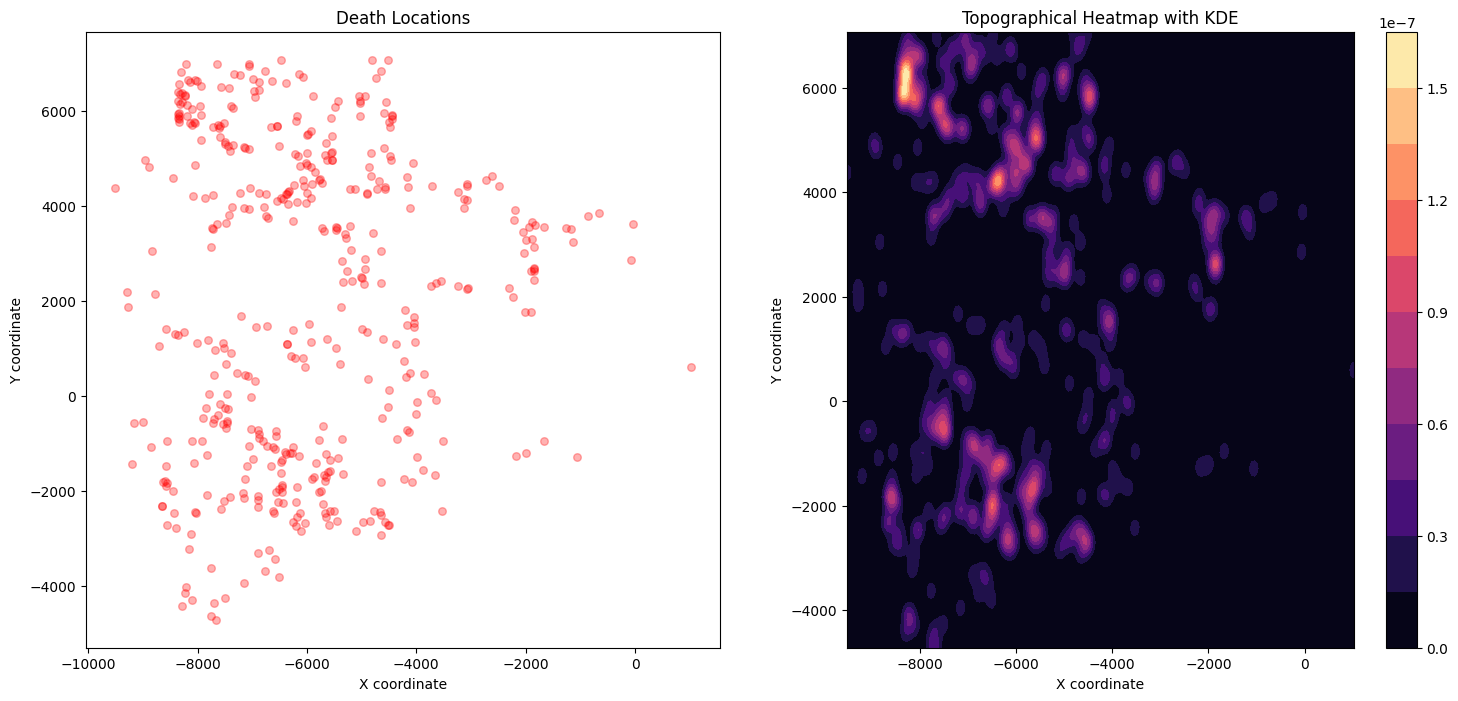

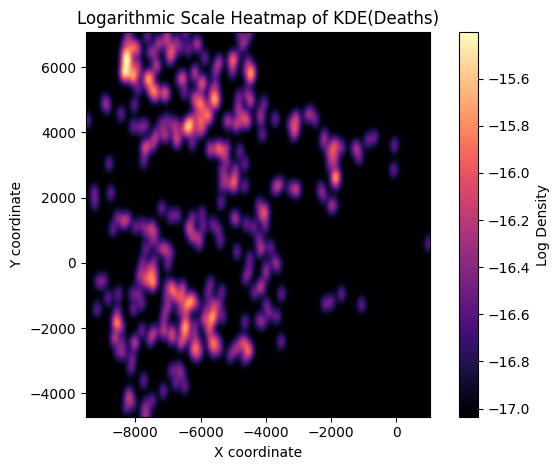

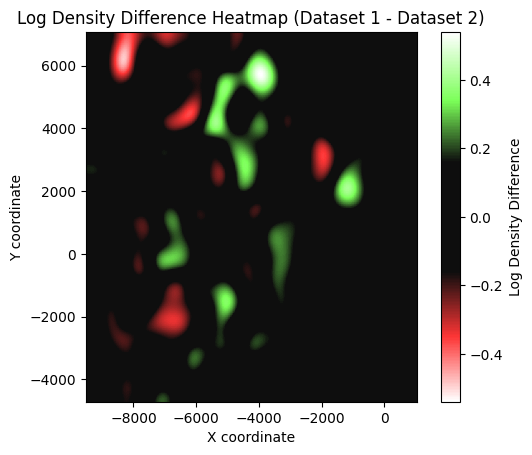

In [27]:
#INPUT HERE


attack_options = {
    "kills": {"lower": 0//50, "upper": 7950//50}, #between 0 160 
    "deaths": {"lower": 0//50, "upper": 7950//50}

}
defense_options = {
    "kills": {"lower": 0//50, "upper": 7950//50}, #between 0 160
    "deaths": {"lower": 0//50, "upper": 7950//50}
}

plot_activity(test_allData, 'Ascent', attack_options, defense_options)
plot_data(test_allData, 'Ascent', attack_options, defense_options)



In [ ]:
#EVERYTHING BELOW THIS POINT IS CODE FOR TESTING stuff

In [ ]:
#test heatmaps 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Example list of unique coordinate points with decimal values
points = [(1.2, 3.4), (2.3, 3.1), (3.5, 4.7), (4.1, 4.3), (4.8, 4.9), (4.5, 4.2), 
          (5.6, 6.1), (1.1, 2.4), (1.7, 2.9), (2.6, 2.1), (3.3, 3.7), (3.8, 3.2), 
          (3.9, 3.5), (4.6, 5.2), (6.1, 7.3), (6.3, 7.8), (7.2, 8.1), (7.4, 8.6), 
          (7.9, 8.2), (8.5, 9.1), (8.2, 9.5), (9.1, 10.3), (9.6, 10.1), (10.2, 11.4)]

# Extract x and y coordinates
x_coords, y_coords = zip(*points)

# Perform kernel density estimation
xy = np.vstack([x_coords, y_coords])
kde = gaussian_kde(xy, bw_method=0.5)  # Adjust bandwidth to change the decay rate
x_min, x_max = min(x_coords) - 1, max(x_coords) + 1
y_min, y_max = min(y_coords) - 1, max(y_coords) + 1
x, y = np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100)
X, Y = np.meshgrid(x, y)
Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

# Plot the scatter plot of points
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.scatter(x_coords, y_coords, c='blue', marker='o')
plt.title('Scatter Plot of Coordinate Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')

# Plot the KDE contour map
plt.subplot(1, 2, 2)
contour = plt.contourf(X, Y, Z, levels=10, cmap='magma')  # Adjust levels as needed
plt.colorbar(contour)
plt.title('Topographical Heatmap with KDE')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')

plt.tight_layout()
plt.show()



In [ ]:
#test GUI
import tkinter as tk
from tkinter import ttk

def update_label():
    start_value = start_slider.get()
    end_value = end_slider.get()
    label.config(text=f"Values between {start_value} and {end_value}")

root = tk.Tk()
root.title("Range Slider GUI")

start_slider = ttk.Scale(root, from_=0, to=20, orient=tk.HORIZONTAL, length=200)
start_slider.pack()

end_slider = ttk.Scale(root, from_=0, to=20, orient=tk.HORIZONTAL, length=200)
end_slider.pack()

label = tk.Label(root, text="Values between 0 and 20")
label.pack()

button = tk.Button(root, text="Update", command=update_label)
button.pack()

root.mainloop()


In [ ]:
#LOG Scale testing
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate example two-dimensional dataset
x = np.random.normal(loc=0, scale=1, size=1000)
y = np.random.normal(loc=0, scale=1, size=1000)

# Perform kernel density estimation
xy = np.vstack([x, y])
kde = gaussian_kde(xy, bw_method=0.2)  # Adjust bandwidth as needed

# Create a grid for the density plot
x_min, x_max = x.min() - 1, x.max() + 1
y_min, y_max = y.min() - 1, y.max() + 1
x_grid = np.linspace(x_min, x_max, 100)
y_grid = np.linspace(y_min, y_max, 100)
X, Y = np.meshgrid(x_grid, y_grid)
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kde(positions).T, X.shape)

# Plotting
plt.figure(figsize=(18, 8))

# Plot without logarithmic scale (left subplot)
plt.subplot(1, 3, 1)
plt.scatter(x, y, c='blue', alpha=0.5, marker='o')
plt.title('Scatter Plot of Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')

# Plot with linear scale (middle subplot)
plt.subplot(1, 3, 2)
plt.imshow(Z, origin='lower', extent=[x_min, x_max, y_min, y_max], cmap='viridis')
plt.colorbar(label='Density')
plt.title('Linear Scale Heatmap of KDE')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')

# Plot with logarithmic scale (right subplot)
plt.subplot(1, 3, 3)
plt.imshow(np.log(Z + 0.01), origin='lower', extent=[x_min, x_max, y_min, y_max], cmap='viridis')
plt.colorbar(label='Log Density')
plt.title('Logarithmic Scale Heatmap of KDE')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate example two-dimensional dataset
x = np.random.normal(loc=0, scale=1, size=1000)
y = np.random.normal(loc=0, scale=1, size=1000)

# Perform kernel density estimation
xy = np.vstack([x, y])
kde = gaussian_kde(xy, bw_method=0.3)  # Adjust bandwidth as needed

# Create a grid for the density plot
x_min, x_max = x.min() - 1, x.max() + 1
y_min, y_max = y.min() - 1, y.max() + 1
x_grid = np.linspace(x_min, x_max, 100)
y_grid = np.linspace(y_min, y_max, 100)
X, Y = np.meshgrid(x_grid, y_grid)
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kde(positions).T, X.shape)

# Apply logarithmic scaling to enhance contrast
Z_log = np.log(Z+ 0.04)  # Adding 1 to avoid log(0)

# Plotting
plt.figure(figsize=(18, 6))

# Plot 1: Scatter plot of raw points
plt.subplot(1, 3, 1)
plt.scatter(x, y, c='blue', alpha=0.5, marker='o')
plt.title('Scatter Plot of Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')

# Plot 2: Linear scale heatmap
plt.subplot(1, 3, 2)
plt.imshow(Z, cmap='viridis', origin='lower', extent=[x_min, x_max, y_min, y_max])
plt.colorbar(label='Density')
plt.title('Linear Scale Heatmap of KDE')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')

# Plot 3: Logarithmic scale heatmap
plt.subplot(1, 3, 3)
plt.imshow(Z_log, cmap='viridis', origin='lower', extent=[x_min, x_max, y_min, y_max])
plt.colorbar(label='Log Density')
plt.title('Logarithmic Scale Heatmap of KDE')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.ndimage import gaussian_filter
import matplotlib.colors as mcolors

# Generate example datasets with shifted means
np.random.seed(0)
x1 = np.random.normal(loc=0, scale=1, size=1000)
y1 = np.random.normal(loc=0, scale=1, size=1000)
x2 = np.random.normal(loc=1, scale=1, size=1000)
y2 = np.random.normal(loc=0, scale=1, size=1000)

# Combine data to get common grid extents
all_x = np.concatenate([x1, x2])
all_y = np.concatenate([y1, y2])
x_min, x_max = all_x.min() - 1, all_x.max() + 1
y_min, y_max = all_y.min() - 1, all_y.max() + 1
x_grid = np.linspace(x_min, x_max, 200)
y_grid = np.linspace(y_min, y_max, 200)
X, Y = np.meshgrid(x_grid, y_grid)
positions = np.vstack([X.ravel(), Y.ravel()])

# Perform kernel density estimation for dataset 1
xy1 = np.vstack([x1, y1])
kde1 = gaussian_kde(xy1, bw_method=0.2)
Z1 = np.reshape(kde1(positions).T, X.shape)

# Perform kernel density estimation for dataset 2
xy2 = np.vstack([x2, y2])
kde2 = gaussian_kde(xy2, bw_method=0.2)
Z2 = np.reshape(kde2(positions).T, X.shape)

# Apply logarithmic scaling
Z1_log = np.log(Z1 + 1)  # Adding 1 to avoid log(0)
Z2_log = np.log(Z2 + 1)  # Adding 1 to avoid log(0)

# Compute the difference between the two KDEs
Z_diff_log = Z1_log - Z2_log

Z_diff_log = gaussian_filter(Z_diff_log, sigma=0)


# Plotting the individual heatmaps and difference heatmap
plt.figure(figsize=(18, 6))

# Plot for dataset 1
plt.subplot(1, 3, 1)
plt.imshow(Z1_log, cmap='viridis', origin='lower', extent=[x_min, x_max, y_min, y_max])
plt.colorbar(label='Log Density')
plt.title('Log KDE Heatmap for Dataset 1')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')

# Plot for dataset 2
plt.subplot(1, 3, 2)
plt.imshow(Z2_log, cmap='viridis', origin='lower', extent=[x_min, x_max, y_min, y_max])
plt.colorbar(label='Log Density')
plt.title('Log KDE Heatmap for Dataset 2')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')



# Create a custom colormap with a nonlinear transition to white
colors = [(0, 'blue'), (0.4, 'white'), (0.6, 'white'), (1, 'red')]
cmap_diff = mcolors.LinearSegmentedColormap.from_list('custom_bwr', colors)

# Plot for the difference heatmap
plt.subplot(1, 3, 3)
plt.imshow(Z_diff_log, cmap=cmap_diff, origin='lower', extent=[x_min, x_max, y_min, y_max], vmin=-np.abs(Z_diff_log).max(), vmax=np.abs(Z_diff_log).max())
plt.colorbar(label='Log Density Difference')
plt.title('Log Density Difference Heatmap (Dataset 1 - Dataset 2)')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')

plt.tight_layout()
plt.show()
